# Instagram Dataset
The Data is about how much time people spend on instagram the more the time the higher the spending score.

## Importing all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Instagram visits clustering.csv")
df

,User ID,Instagram visit score,Spending_rank(0 to 100)
0,0,63,24.050708
1,1,61,25.223290
2,2,104,18.528245
3,3,82,86.890232
4,4,14,31.492397
...,...,...,...
2595,2595,25,25.745908
2596,2596,52,9.275066
2597,2597,100,84.999487
2598,2598,87,20.530806


### Checking for any null values if any

<AxesSubplot:>

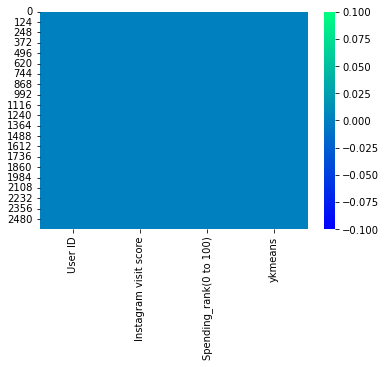

In [36]:
sns.heatmap(df.isna(),cmap ='winter')

<AxesSubplot:xlabel='Instagram visit score', ylabel='Spending_rank(0 to 100)'>

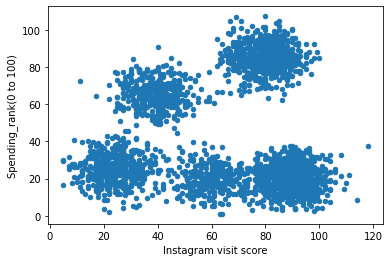

In [37]:
df.plot(kind ='scatter',x ='Instagram visit score', y='Spending_rank(0 to 100)')
# This plot shows that the data has approx 4-5 clusters.

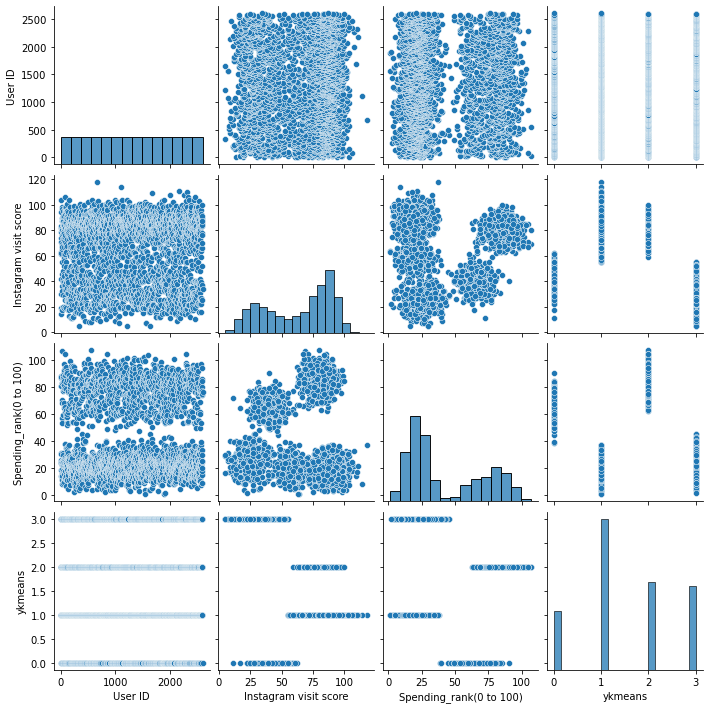

In [38]:
sns.pairplot(df)

In [39]:
cols = df.select_dtypes('float64').columns
cols

Index(['Spending_rank(0 to 100)'], dtype='object')

<AxesSubplot:xlabel='Spending_rank(0 to 100)', ylabel='Density'>

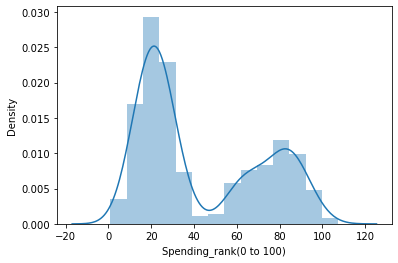

In [40]:
sns.distplot(df['Spending_rank(0 to 100)'])

In [41]:
x = df.iloc[:,1:]
x

,Instagram visit score,Spending_rank(0 to 100),ykmeans
0,63,24.050708,1
1,61,25.223290,1
2,104,18.528245,1
3,82,86.890232,2
4,14,31.492397,3
...,...,...,...
2595,25,25.745908,3
2596,52,9.275066,3
2597,100,84.999487,2
2598,87,20.530806,1


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [43]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

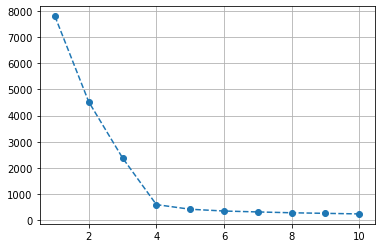

In [44]:
plt.plot(range(1,11), wcss, "o--")
plt.grid()
plt.show()

In [45]:
kmeans = KMeans(n_clusters=4, random_state=1)
ylabel = kmeans.fit_predict(x)

In [46]:
df["ykmeans"] = ylabel

In [47]:
df

,User ID,Instagram visit score,Spending_rank(0 to 100),ykmeans
0,0,63,24.050708,1
1,1,61,25.223290,1
2,2,104,18.528245,1
3,3,82,86.890232,0
4,4,14,31.492397,2
...,...,...,...,...
2595,2595,25,25.745908,2
2596,2596,52,9.275066,2
2597,2597,100,84.999487,0
2598,2598,87,20.530806,1


In [48]:
kmeans.cluster_centers_

array([[ 0.61304814,  1.46685066,  0.4827548 ],
       [ 0.74958532, -0.79908419, -0.51817222],
       [-1.35568221, -0.64478164,  1.48368183],
       [-0.90211775,  0.77502236, -1.51909925]])

In [49]:
df["ykmeans"].value_counts()

1    1027
0     600
2     573
3     400
Name: ykmeans, dtype: int64

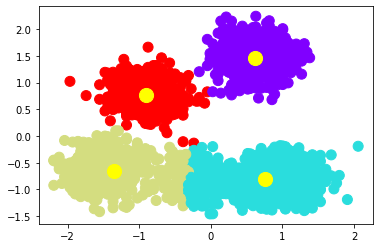

In [50]:
plt.scatter(x[:, 0], x[:, 1], c=ylabel, s=100, cmap="rainbow")#Cluster plotting
#Centroids poltting
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="yellow", s=200)
plt.show()

In [51]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [52]:
x

,Instagram visit score,Spending_rank(0 to 100)
0,63,24.050708
1,61,25.223290
2,104,18.528245
3,82,86.890232
4,14,31.492397
...,...,...
2595,25,25.745908
2596,52,9.275066
2597,100,84.999487
2598,87,20.530806


In [53]:
y

0       1
1       1
2       1
3       0
4       2
       ..
2595    2
2596    2
2597    0
2598    1
2599    3
Name: ykmeans, Length: 2600, dtype: int32

In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [56]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    return model

In [57]:
mymodel(GaussianNB())

Training Accuracy : 0.9868131868131869
Testing Accuracy : 0.9897435897435898


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       0.98      1.00      0.99       289
           2       0.99      0.96      0.98       169
           3       1.00      0.98      0.99       132

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



GaussianNB()

In [58]:
mymodel(MultinomialNB())

Training Accuracy : 0.7576923076923077
Testing Accuracy : 0.7538461538461538


              precision    recall  f1-score   support

           0       0.63      0.72      0.67       190
           1       0.92      0.99      0.95       289
           2       0.53      0.37      0.43       169
           3       0.77      0.80      0.78       132

    accuracy                           0.75       780
   macro avg       0.71      0.72      0.71       780
weighted avg       0.74      0.75      0.74       780



MultinomialNB()

In [59]:
mymodel(LogisticRegression(multi_class='ovr'))

Training Accuracy : 0.9912087912087912
Testing Accuracy : 0.9948717948717949


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       0.99      1.00      1.00       289
           2       0.99      0.99      0.99       169
           3       1.00      0.98      0.99       132

    accuracy                           0.99       780
   macro avg       1.00      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



LogisticRegression(multi_class='ovr')

**Conclusion:** In this project we will use Logistic Regression having multiclass as ovr. 